# Covariance - Positive

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beer_data = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/beer_dataset.csv")
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


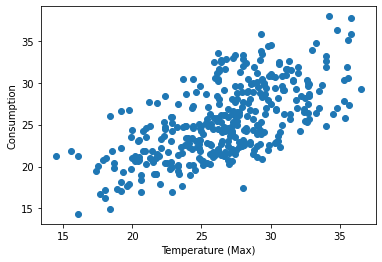

In [3]:
# PLot the consumption as a function of maximal temperature
plt.scatter(
    beer_data['Temperatura Maxima (C)'],
    beer_data['Consumo de cerveja (litros)'],
    cmap=0.5
)
plt.xlabel("Temperature (Max)")
plt.ylabel("Consumption")
plt.show()

In [4]:
# Calculating co-variance
x = beer_data['Temperatura Maxima (C)']
y = beer_data['Consumo de cerveja (litros)']

covar = (np.sum((x-x.mean())*(y-y.mean())))/x.shape[0]
print(f'Covariance: {covar}')

Covariance: 12.172649474197785


# Covariance - Negative

In [5]:
happ_data = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/happiness_2020.csv")
happ_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


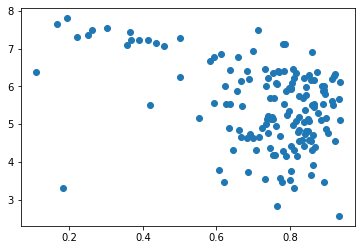

In [6]:
X = happ_data['Perceptions of corruption']
Y = happ_data['Ladder score']
plt.scatter(X,Y, cmap=0.5)

In [7]:
covar = np.cov(X,Y)
print(f'Covariance matrix: \n {covar}')
# covariance is the value outside of the diagonal: -0.08 in this case

Covariance matrix: 
 [[ 0.03068538 -0.08150217]
 [-0.08150217  1.23714494]]


# Correlation

* A correlation of -1 means that there is a perfect negative linear relationship and a correlation of 1 indicates a perfect positive linear relationship. A correlation of 0 indicates that the variables are uncorrelated (no linear relationship).

In [8]:
# Taking the consumption of beer as a function of temperature.
np.corrcoef(x,y)

# Correlation is advantageous because you can compare it between pairs of variables since it not depends on the scale of the data.

array([[1.        , 0.64267247],
       [0.64267247, 1.        ]])

# Simulation of the Dice Experiment - Probability Distribution (PMF)


In [9]:
# You call X the random variable corresponding to this experiment. Assuming that the die is fair,
# each outcome is equiprobable: if you run the experiment a large number of times, you will get
# each outcome approximately the same number of times.

rolls = np.random.randint(1,7,20) # Rolling dice 20 time
print(rolls)

[4 2 1 2 2 4 2 5 2 2 6 3 3 4 5 2 5 4 4 2]


<StemContainer object of 3 artists>

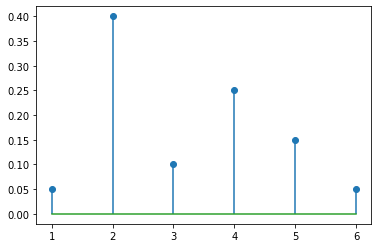

In [10]:
# Assuming the die is fair, you should have an uniform distribution, that is,equiprobable outcomes.
# Let’s visualize the quantity of each outcome you got in the random experiment.

val, counts = np.unique(rolls, return_counts=True)
plt.stem(val, counts/len(rolls), basefmt="C2-", use_line_collection=True)

<StemContainer object of 3 artists>

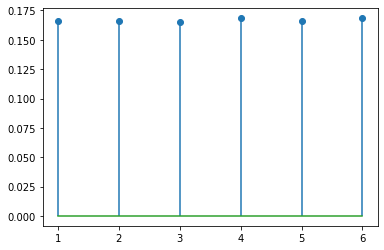

In [12]:
# With a uniform distribution, the plot would have the same height for each outcome.
# However, the distribution shown in above plot doesn’t look uniform. That’s because you didn’t repeat the experiment
# enough: the probabilities will stand when you repeat the experiment a large number of times

throws = np.random.randint(1,7,100000)
val, counts = np.unique(throws, return_counts=True)
plt.stem(val, counts/len(throws), basefmt='C2-', use_line_collection=True)

# Probability Density Function (PDF)

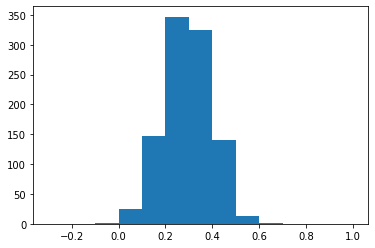

In [18]:
# The integral of the probability density function over a particular interval gives
# you the probability that a random variable takes a value in this interval

# Example
np.random.seed(123)
mu, sigma = 0.3, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

hist = plt.hist(data, bins=13, range=(-0.3,1))

# hist[0] - Y axis
# hist[1] - X axis

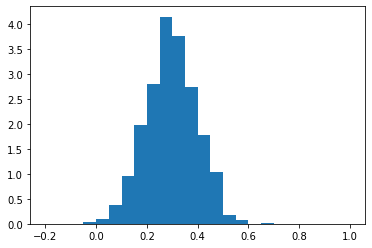

In [19]:
# use the parameter density to make the y-axis correspond to the probability density
# instead of the count of values in each bin

hist = plt.hist(data, bins=24, range=(-0.2, 1), density=True)

In [23]:
# To calculate the probability to draw a value in a certain range from the density,
# you need to use the area under the curve. In the case of histograms, this is the
# area of the bars.
# Example with the bar ranging from 0.2 to 0.25

print(f'Density : {hist[0][8].round(4)}')
print(f'Range x from {hist[1][8].round(4)} to {hist[1][9].round(4)}')

# As each bar corresponds to a range of 0.05 (1-(-0.2) / 24), and in the example above
# height of the bar is 2.8, Hence the Area of the bar is:

print(f'Area of bar: {round(2.8*0.05, 2)}')

# This means that the probability of getting a value between 0.2 and 0.25 is around 0.14, or 14%.

Density : 2.8
Range x from 0.2 to 0.25
Area of bar: 0.14


In [25]:
# As we know the sum of the probabilities must be equal to one, so the sum of the
# bar’s areas should be equal to one.

print(f'Sum of all probabilities: {(hist[0] * 0.05).sum().round(4)}')

Sum of all probabilities: 1.0


# Central Limit Theorem
* The central limit theorem says that, if you consider <u> multiple independent
random variables drawn from a distribution </u> with large enough and average
n or sum their outcomes, the distribution of the results will be approximated
by a <u>Gaussian distribution</u>.

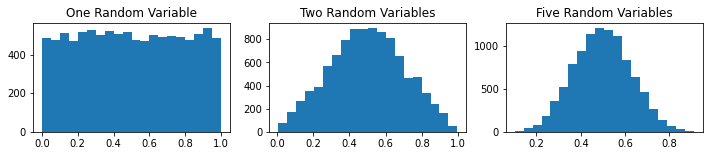

In [36]:
# Continous Distribution

# This function allows us to do the experiment with various number of random variables
def continous_distribution(num_rand_var):
    n_trials = 10000
    all_trails = np.zeros(n_trials)
    for i in range(n_trials):
        all_rand_var = np.zeros(num_rand_var)
        for rand_var in range(num_rand_var):
            all_rand_var[rand_var] = np.random.uniform(0,1)
        all_trails[i] = all_rand_var.mean()

    return all_trails

# Let’s use it with one, two, and five random variables and look at the
# distribution of the results with histograms

rand_var_uniform_1 = continous_distribution(1)
rand_var_uniform_2 = continous_distribution(2)
rand_var_uniform_5 = continous_distribution(5)

f, ax = plt.subplots(1,3, figsize=[12,2])
ax[0].hist(rand_var_uniform_1, bins=20)
ax[1].hist(rand_var_uniform_2, bins=20)
ax[2].hist(rand_var_uniform_5, bins=20)
ax[0].set_title("One Random Variable")
ax[1].set_title("Two Random Variables")
ax[2].set_title("Five Random Variables")
plt.show()

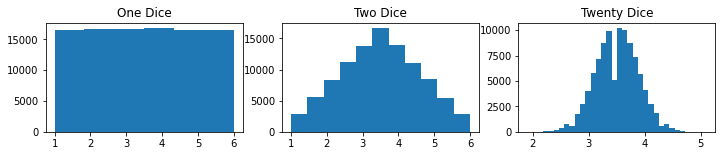

In [40]:
# Discrete Distribution

def discrete_distribution(n_dice):
    n_trials = 100000
    all_trials = np.zeros(n_trials)
    for i in range(n_trials):
        all_dice = np.zeros(n_dice)
        for dice in range(n_dice):
            all_dice[dice] = np.random.choice([1,2,3,4,5,6])
        all_trials[i] = all_dice.mean()

    return all_trials

rand_var_dice_1 = discrete_distribution(1)
rand_var_dice_2 = discrete_distribution(2)
rand_var_dice_20 = discrete_distribution(20)

f, ax = plt.subplots(1,3, figsize=[12,2])
ax[0].hist(rand_var_dice_1, bins=6)
ax[1].hist(rand_var_dice_2, bins=11)
ax[2].hist(rand_var_dice_20, bins=34)
ax[0].set_title("One Dice")
ax[1].set_title("Two Dice")
ax[2].set_title("Twenty Dice")
plt.show()